<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("domain_properties_syd.csv")

In [3]:
data.head()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/01/2016,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/01/2016,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/01/2016,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/01/2016,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/01/2016,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [4]:
data.shape #11160 Rows in total

(11160, 17)

In [5]:
data.info()  #no NA values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

In [6]:
data["date_sold"]=pd.to_datetime(data["date_sold"])
data.head()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,2016-01-13,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,2016-01-13,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,2016-01-13,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,2016-01-13,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,2016-01-13,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [7]:
#Change data_sold column into Year and Month
data["Year"]=data["date_sold"].dt.year
data["Month"]=data["date_sold"].dt.month
data=data.drop(['date_sold'],axis="columns")

In [8]:
data.head()

,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,Year,Month
0,530000,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05,2016,1
1,525000,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54,2016,1
2,480000,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59,2016,1
3,452000,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12,2016,1
4,365500,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98,2016,1


In [9]:
#for readbility
data=data[['Year', 'Month','price','suburb','type','num_bath','num_bed','num_parking','property_size','suburb_population','suburb_median_income','suburb_sqkm','suburb_lat','suburb_lng','suburb_elevation','cash_rate','property_inflation_index','km_from_cbd']]

In [10]:
data.head()

,Year,Month,price,suburb,type,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,2016,1,530000,Kincumber,House,4,4,2,1351,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,2016,1,525000,Halekulani,House,2,4,2,594,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,2016,1,480000,Chittaway Bay,House,2,4,2,468,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,2016,1,452000,Leumeah,House,1,3,1,344,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,2016,1,365500,North Avoca,Vacant land,0,0,0,1850,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [11]:
#Display all the rows
pd.set_option("display.max_rows",None)

In [12]:
#Look at the average house price by property type at different year level
avg_year_type=pd.DataFrame(data.groupby(["Year","type"])["price"].mean().round(2))
avg_year_type

price
Year type                                     
2016 Apartment / Unit / Flat        1151656.90
     Block of Units                 6000000.00
     Development Site               1580000.00
     Duplex                          865600.00
     House                          1327431.92
     New House & Land               1937000.00
     New land                        365000.00
     Semi-Detached                  1120680.00
     Studio                          640000.00
     Terrace                        1704400.00
     Townhouse                       744454.55
     Vacant land                     546320.51
     Villa                           630166.67
2017 Acreage / Semi-Rural           1900000.00
     Apartment / Unit / Flat        1153073.02
     Block of Units                 4140000.00
     Development Site               2000000.00
     Duplex                         1200000.00
     House                          1339514.23
     New Apartments / Off the Plan   892333.33
     New House & Land               1018250.00
     Semi-Detached                  1226055.56
     Studio                          682500.00
     Terrace                        2210000.00
     Townhouse                       738416.67
     Vacant land                     792973.68
     Villa                          1007470.59
2018 Acreage / Semi-Rural           2050000.00
     Apartment / Unit / Flat         910332.81
     Block of Units                 2940500.00
     Duplex                         1047825.00
     House                          1325089.17
     New Apartments / Off the Plan  1500000.00
     Rural                          1680000.00
     Semi-Detached                  1358125.00
     Terrace                        1753333.33
     Townhouse                       779394.74
     Vacant land                     967029.41
     Villa                           816666.67
2019 Acreage / Semi-Rural           1600000.00
     Apartment / Unit / Flat         893030.57
     Block of Units                 3270333.33
     Development Site               3200000.00
     Duplex                         1097888.89
     House                          1398510.24
     New Apartments / Off the Plan  1528333.33
     New House & Land                875966.67
     New land                        975000.00
     Semi-Detached                  1565363.64
     Studio                          390000.00
     Terrace                        1819600.00
     Townhouse                       733447.05
     Vacant land                     878685.32
     Villa                           870928.57
2020 Acreage / Semi-Rural           2195000.00
     Apartment / Unit / Flat        1038881.39
     Block of Units                 2891428.57
     Development Site               2480000.00
     Duplex                         1033583.33
     House                          1669081.91
     New House & Land                843333.33
     Rural                          2200000.00
     Semi-Detached                  1377090.91
     Studio                          450000.00
     Terrace                        1986071.43
     Townhouse                       974180.76
     Vacant land                    1197386.61
     Villa                           803210.00
2021 Acreage / Semi-Rural           2109601.83
     Apartment / Unit / Flat        1500803.73
     Block of Units                 3249526.32
     Development Site               1591666.67
     Duplex                         1656103.45
     House                          2044563.74
     New Apartments / Off the Plan  2135000.00
     New House & Land               1048333.33
     Rural                          1800000.00
     Semi-Detached                  1781672.27
     Terrace                        2564900.00
     Townhouse                      1465467.46
     Vacant land                    1944928.32
     Villa                          1196978.26
2022 House                          1043750.00

In [13]:
#Look at the average house price by property type 
min_max_year_type=data.groupby(["Year","type"])["price"].agg([min,max])
min_max_year_type

min       max
Year type                                            
2016 Apartment / Unit / Flat         272500   8650000
     Block of Units                 6000000   6000000
     Development Site               1580000   1580000
     Duplex                          570000   1380000
     House                           304000  14500000
     New House & Land                925000   2949000
     New land                        365000    365000
     Semi-Detached                   490000   2200000
     Studio                          640000    640000
     Terrace                        1400000   2310000
     Townhouse                       420000   1750000
     Vacant land                     225000   1685000
     Villa                           400000   1156000
2017 Acreage / Semi-Rural           1500000   2300000
     Apartment / Unit / Flat         312000   6300000
     Block of Units                 3000000   5700000
     Development Site               2000000   2000000
     Duplex                          660000   1705000
     House                           353000   9000000
     New Apartments / Off the Plan   665000   1307000
     New House & Land                783000   1370000
     Semi-Detached                   593000   2250000
     Studio                          555000    810000
     Terrace                        2210000   2210000
     Townhouse                       465000   1532000
     Vacant land                     290000   2750000
     Villa                           458000   7250000
2018 Acreage / Semi-Rural           2050000   2050000
     Apartment / Unit / Flat         295000   3100000
     Block of Units                 2431000   3450000
     Duplex                          430000   2050000
     House                           355000   6400000
     New Apartments / Off the Plan  1400000   1600000
     Rural                          1140000   2220000
     Semi-Detached                   465000   2450000
     Terrace                         775000   2865000
     Townhouse                       510000   1260000
     Vacant land                     280000   2750000
     Villa                           375000   1595000
2019 Acreage / Semi-Rural           1600000   1600000
     Apartment / Unit / Flat         275000   3450000
     Block of Units                 2661000   3950000
     Development Site               3200000   3200000
     Duplex                          503000   2560000
     House                           290000  16988000
     New Apartments / Off the Plan  1200000   1960000
     New House & Land                608000   1249900
     New land                        790000   1160000
     Semi-Detached                   850000   4200000
     Studio                          390000    390000
     Terrace                        1000000   3100000
     Townhouse                       340000   1475000
     Vacant land                     315000   5200000
     Villa                           425000   2200000
2020 Acreage / Semi-Rural           1275000   3700000
     Apartment / Unit / Flat         330000   6200000
     Block of Units                 1475000   4500000
     Development Site               2480000   2480000
     Duplex                          660000   1846000
     House                           370000  14480000
     New House & Land                570000   1220000
     Rural                          2200000   2200000
     Semi-Detached                   633000   2945000
     Studio                          450000    450000
     Terrace                        1000000   4520000
     Townhouse                       365000   2125000
     Vacant land                     305000   9600000
     Villa                           390000   1635000
2021 Acreage / Semi-Rural           1420000   3100000
     Apartment / Unit / Flat         365000   7880000
     Block of Units                 1050000   7050000
     Development Site               1175000   2100000
     Duplex                          871000 

In [14]:
data["suburb"].value_counts()

Bateau Bay              68
Castle Hill             62
Baulkham Hills          59
Kellyville              57
Glenmore Park           56
Green Point             54
St Clair                54
Oran Park               51
Toongabbie              50
Berkeley Vale           50
Terrigal                49
Cranebrook              48
Wyoming                 48
Penrith                 46
Turramurra              46
Harrington Park         44
St Ives                 44
Kincumber               44
Narara                  43
Wamberal                43
Ingleburn               43
Killarney Vale          43
Mount Druitt            42
Leichhardt              41
Gorokan                 41
Engadine                40
Bexley                  40
Woy Woy                 39
Marsden Park            39
Miranda                 39
Jordan Springs          39
Wahroonga               39
Long Jetty              38
Carlingford             38
Sylvania                38
Umina Beach             38
Spring Farm             38
G

In [15]:
#Get Top 10 popular suburbs that was bought by most buyers in Sydney
popular_suburb_list = list(data['suburb'].value_counts()[:10].index)
popular_suburb_list

['Bateau Bay',
 'Castle Hill',
 'Baulkham Hills',
 'Kellyville',
 'Glenmore Park',
 'Green Point',
 'St Clair',
 'Oran Park',
 'Toongabbie',
 'Berkeley Vale']

In [16]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,11160.0,2019.56,1.74,2016.00,2018.00,2020.00,2021.00,2022.00
Month,11160.0,7.64,3.34,1.00,5.00,8.00,11.00,12.00
price,11160.0,1675395.27,1290370.96,225000.00,1002000.00,1388000.00,2020000.00,60000000.00
num_bath,11160.0,2.07,1.18,0.00,1.00,2.00,3.00,46.00
num_bed,11160.0,3.76,1.56,0.00,3.00,4.00,4.00,47.00
num_parking,11160.0,2.02,1.45,0.00,1.00,2.00,2.00,50.00
property_size,11160.0,723.01,1048.98,7.00,430.00,600.00,765.00,59100.00
suburb_population,11160.0,9311.56,7541.64,22.00,3977.00,7457.00,12158.25,47176.00
suburb_median_income,11160.0,40168.24,11089.96,14248.00,32448.00,39104.00,45552.00,97500.00
suburb_sqkm,11160.0,5.05,5.82,0.09,1.78,3.57,6.57,87.15


In [17]:
#Look at the maximum and minimum median income across different suburbs
max_min_income=data.groupby(["suburb"])["suburb_median_income"].agg([min,max])
max_min_income

,min,max
suburb,,
Abbotsbury,37492,37492
Abbotsford,50180,50180
Acacia Gardens,47060,47060
Alexandria,69732,69732
Alfords Point,43732,43732
Allambie Heights,40404,40404
Allawah,31928,31928
Ambarvale,28912,28912
Annandale,60424,60424


In [18]:
type_prop_size=data[["suburb","price"]].groupby(by="suburb",as_index=False).max().sort_values(by="price",ascending=False)
type_prop_size

,suburb,price
312,Kurraba Point,60000000
621,Woollahra,17000000
324,Lavender Bay,16988000
381,Mosman,16750000
351,Manly,15250000
158,Darling Point,14500000
108,Castle Cove,14500000
177,Dundas Valley,14480000
151,Cronulla,14000000
456,Point Piper,12750000


In [19]:
#Look at the largest property size group by property type
type_prop_size=data[["type","property_size"]].groupby(by="type",as_index=False).max().sort_values(by="property_size",ascending=False)
type_prop_size

,type,property_size
5,House,59100
1,Apartment / Unit / Flat,20695
14,Vacant land,19350
13,Townhouse,11800
0,Acreage / Semi-Rural,10000
9,Rural,6782
4,Duplex,4000
15,Villa,3016
3,Development Site,2377
2,Block of Units,2310


In [20]:
#Merge type_prop_size and data to see the totoal columns for the largest property size group by property type
df_merge=pd.merge(type_prop_size,data,on=["type","property_size"],how="left")
df_merge

,type,property_size,Year,Month,price,suburb,num_bath,num_bed,num_parking,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,House,59100,2019,9,955000,Winmalee,3,4,2,6202,38740,9.058,-33.67971,150.61119,263,1.00,166.4,59.15
1,Apartment / Unit / Flat,20695,2018,7,785000,Marsfield,2,2,2,13297,32448,3.863,-33.77752,151.10509,87,1.50,166.6,13.73
2,Vacant land,19350,2020,7,1167075,Warrimoo,0,0,0,2450,43524,8.576,-33.72390,150.61735,210,0.25,167.6,57.07
3,Townhouse,11800,2021,11,1035000,North Rocks,2,3,2,7965,40092,5.462,-33.77572,151.01474,92,0.10,220.1,20.61
4,Acreage / Semi-Rural,10000,2017,5,2300000,Erina,4,5,4,4774,28340,5.147,-33.43758,151.38853,19,1.50,176.6,50.24
5,Acreage / Semi-Rural,10000,2017,10,1500000,Wamberal,2,4,3,6550,41496,8.769,-33.41339,151.43838,95,1.50,174.0,54.41
6,Acreage / Semi-Rural,10000,2020,2,2400000,Tumbi Umbi,7,8,8,5108,32344,13.109,-33.37857,151.42921,161,0.75,169.6,57.68
7,Acreage / Semi-Rural,10000,2020,9,2250000,Erina,2,5,2,4774,28340,5.147,-33.43758,151.38853,19,0.25,172.6,50.24
8,Acreage / Semi-Rural,10000,2021,2,2177000,Kincumber,4,6,4,7093,29432,9.914,-33.47252,151.40208,24,0.10,183.1,47.05
9,Acreage / Semi-Rural,10000,2021,9,2050000,Tumbi Umbi,2,4,2,5108,32344,13.109,-33.37857,151.42921,161,0.10,220.1,57.68


In [21]:
sns.set_theme(style="darkgrid",palette="deep")

Text(0.5, 1.0, 'Trend of the price of each property type')

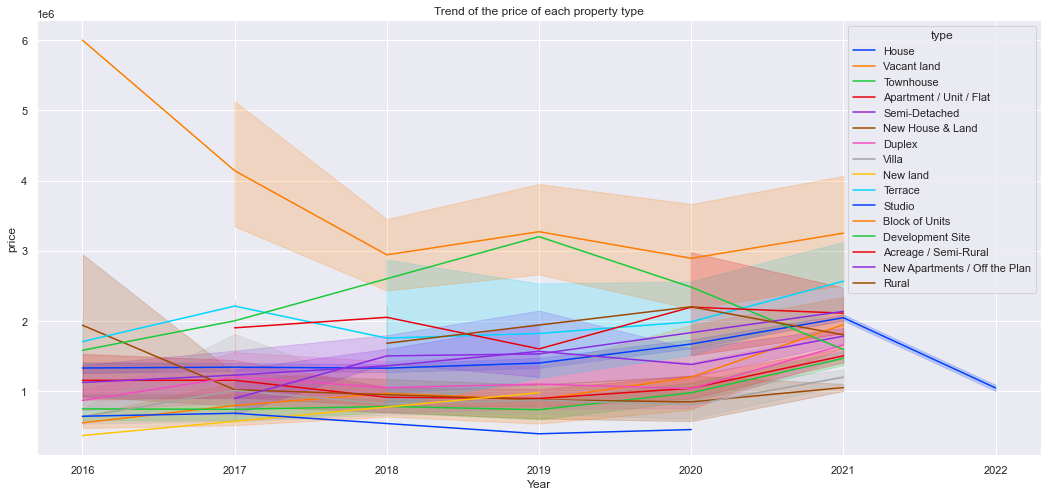

In [22]:
#Create a line plot to look at the the property price at different year group by type
plt.figure(figsize=(18,8))
sns.lineplot(x = 'Year', y = 'price',
             hue = 'type', data = data,
             palette = 'bright').set_title("Trend of the price of each property type")

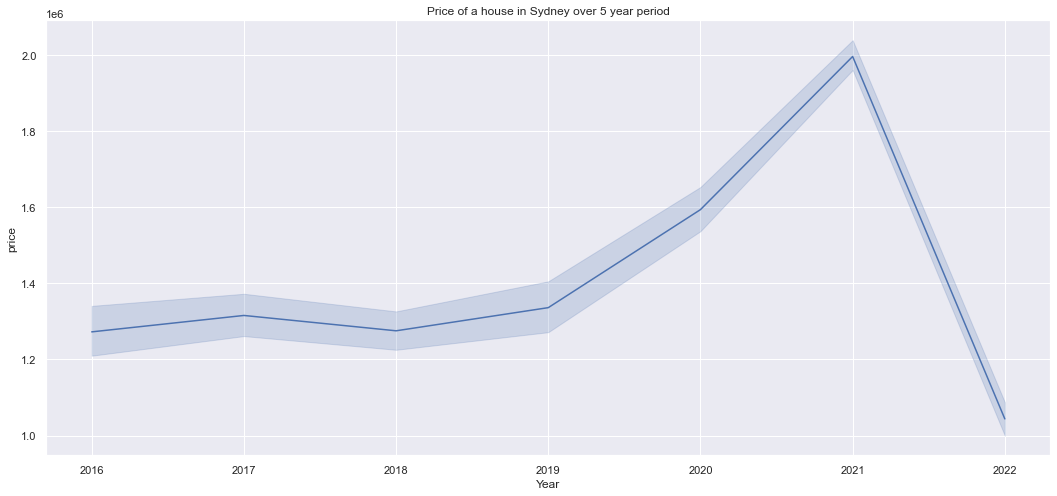

In [23]:
#Look at the property price trend for Sydney
plt.figure(figsize=(18,8))
fig = sns.lineplot(x = 'Year', y ='price', 
             data = data,
             palette = 'colorblind').set_title('Price of a house in Sydney over 5 year period')

Text(0.5, 0.98, 'The relationship between property price and distance from cbd')

<Figure size 1296x576 with 0 Axes>

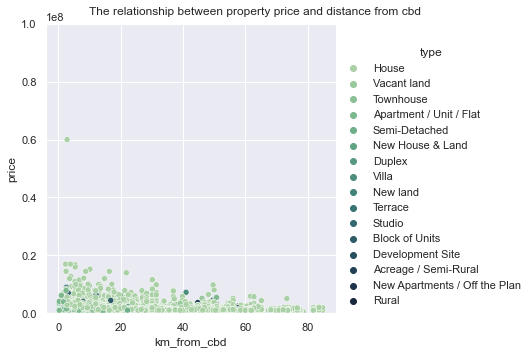

In [24]:
plt.figure(figsize=(18,8))
g=sns.relplot(x="km_from_cbd", y="price", hue="type", 
            palette="ch:r=-.5,l=.75",data=data)
plt.ylim(0,100000000)
g.fig.suptitle('The relationship between property price and distance from cbd',ha="center",va="top",size=12)

Text(0.5, 1.0, 'Relationship between income and property price over 5 year period')

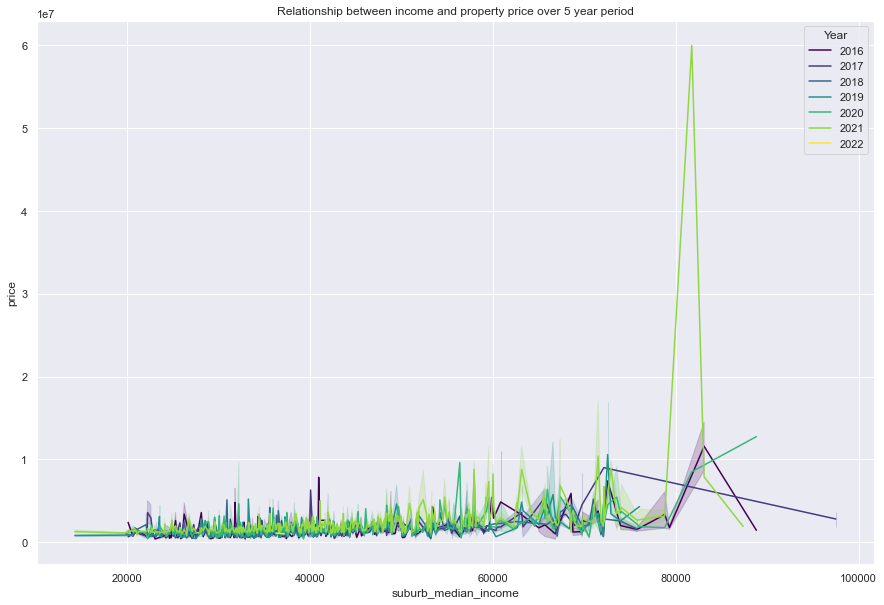

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'suburb_median_income', y ='price', 
             data = data,hue="Year",
             palette = 'viridis').set_title('Relationship between income and property price over 5 year period')

Text(0.5, 1.0, 'Property price over 5 year period')

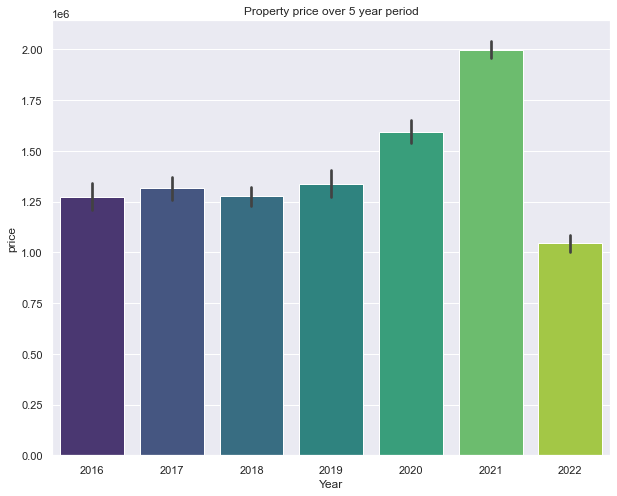

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Year', y ='price', 
             data = data,
             palette = 'viridis').set_title('Property price over 5 year period')

In [27]:
#Find the popular house
house_filt = ['House']

only_house = data[data.type.isin(house_filt)].copy()
house_price_popular_suburb = only_house[only_house.suburb.isin(popular_suburb_list)].copy()

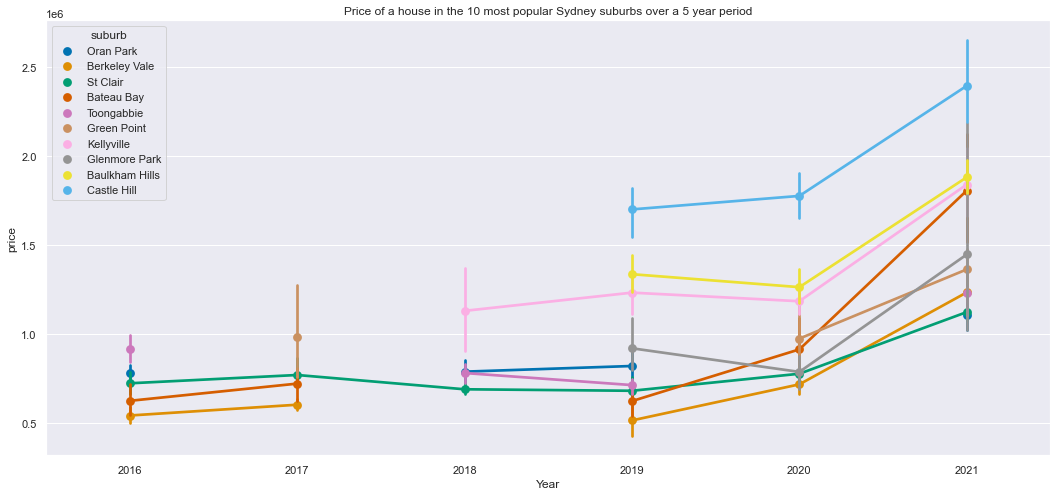

In [28]:
#Look at the most popular suburbs for buying a house in Sydney
plt.figure(figsize=(18,8))
fig2 = sns.pointplot(x = 'Year', y ='price', 
             hue = 'suburb', data = house_price_popular_suburb,
             palette = 'colorblind').set_title('Price of a house in the 10 most popular Sydney suburbs over a 5 year period')

In [29]:
data["type"]

0                                House
1                                House
2                                House
3                                House
4                          Vacant land
5                                House
6                                House
7                                House
8                                House
9                          Vacant land
10                               House
11                               House
12                               House
13                               House
14                               House
15                           Townhouse
16                               House
17                               House
18                         Vacant land
19                               House
20                               House
21                               House
22                               House
23                               House
24                               House
25                       

In [30]:
data['suburb'].value_counts()[:20]

Bateau Bay         68
Castle Hill        62
Baulkham Hills     59
Kellyville         57
Glenmore Park      56
Green Point        54
St Clair           54
Oran Park          51
Toongabbie         50
Berkeley Vale      50
Terrigal           49
Cranebrook         48
Wyoming            48
Penrith            46
Turramurra         46
Harrington Park    44
St Ives            44
Kincumber          44
Narara             43
Wamberal           43
Name: suburb, dtype: int64

Text(0.5, 1.0, 'The 20 most popular suburbs in Sydney')

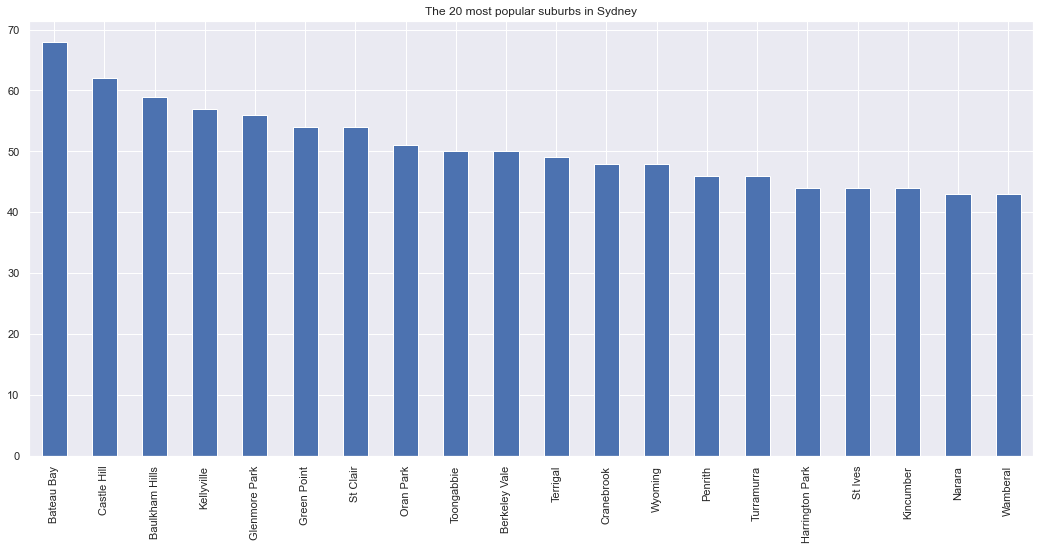

In [31]:
#Find the top 20 popular suburbs where people would like to buy a property
plt.figure(figsize = (18,8))
data['suburb'].value_counts()[:20].plot.bar().set_title("The 20 most popular suburbs in Sydney")

In [32]:
data.head()

,Year,Month,price,suburb,type,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,2016,1,530000,Kincumber,House,4,4,2,1351,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,2016,1,525000,Halekulani,House,2,4,2,594,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,2016,1,480000,Chittaway Bay,House,2,4,2,468,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,2016,1,452000,Leumeah,House,1,3,1,344,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,2016,1,365500,North Avoca,Vacant land,0,0,0,1850,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


Text(0.5, 1.0, 'Population in suburb vs Price')

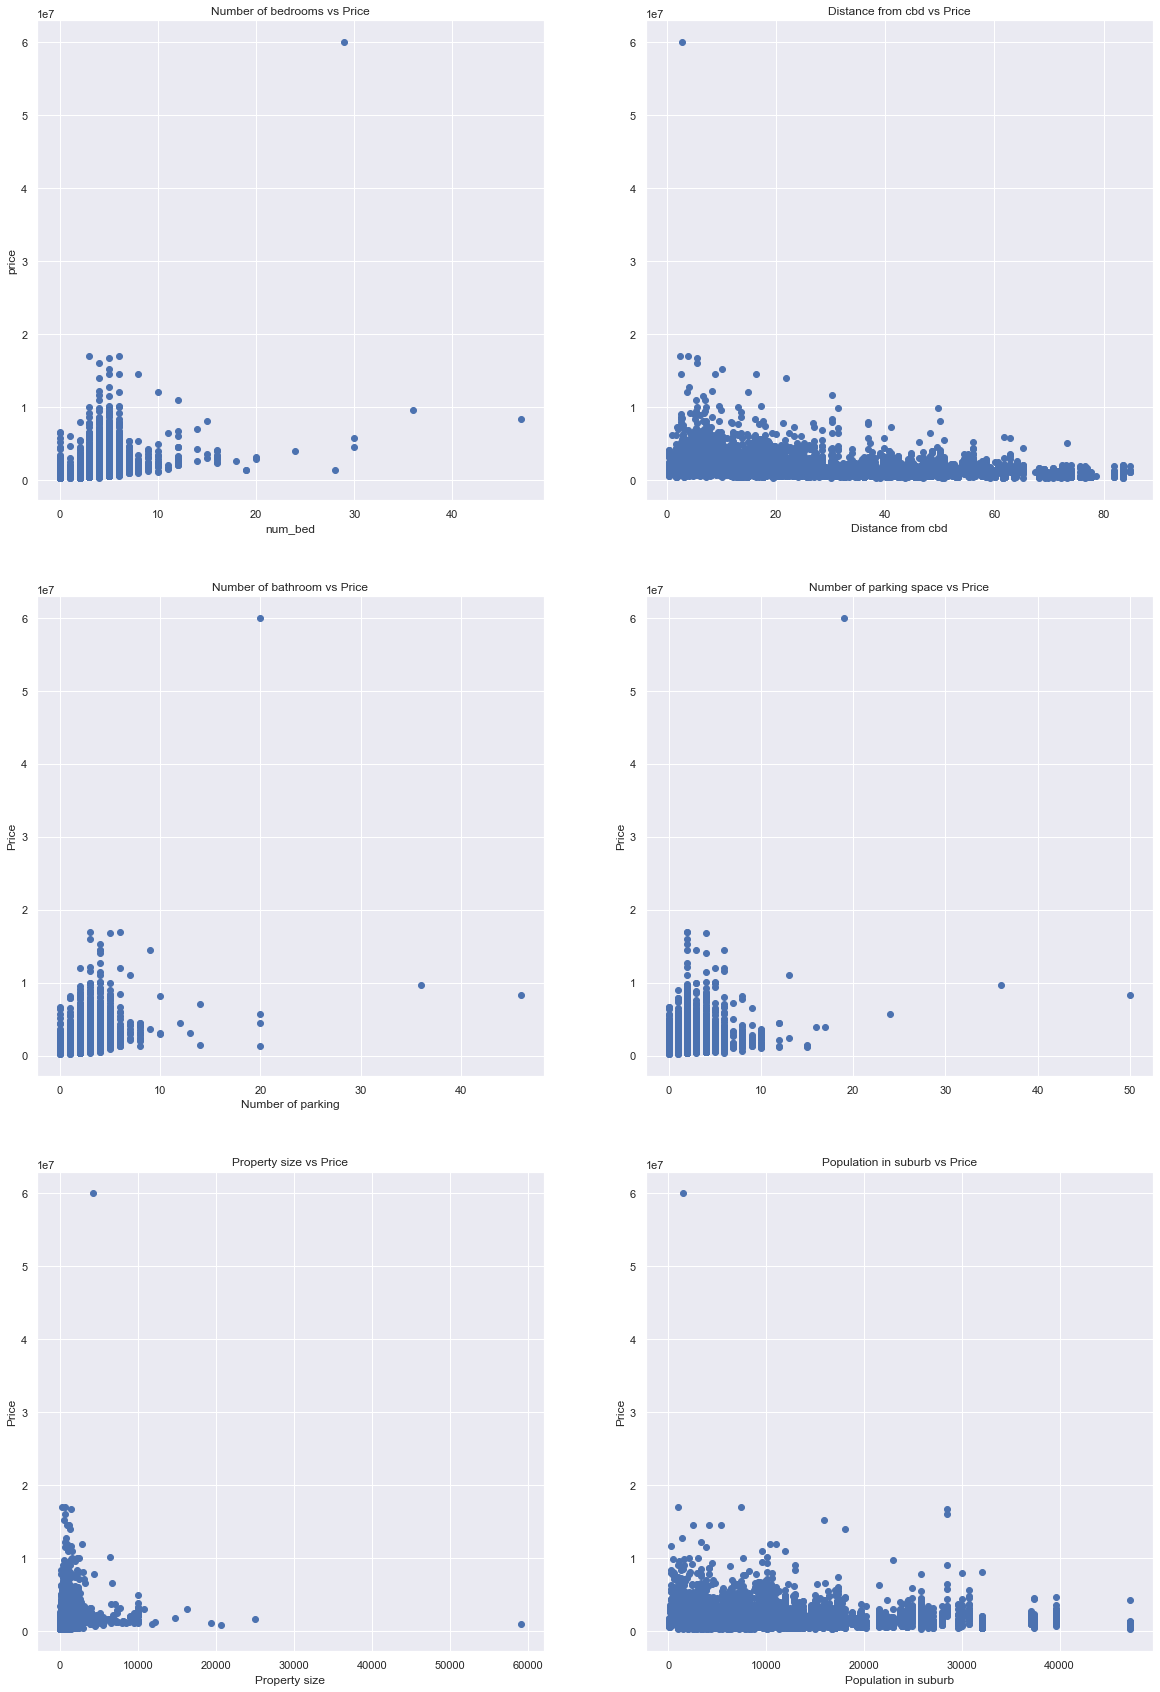

In [33]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

#Look at relationship between bedrooms and property price
# Plot [0,0]
axes[0,0].scatter(x = 'num_bed', y = 'price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('num_bed')
axes[0,0].set_ylabel('price')
axes[0,0].set_title('Number of bedrooms vs Price')

#Look at relationship between distance from cbd vs property price
# Plot [0,1]
axes[0,1].scatter(x = 'km_from_cbd', y = 'price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance from cbd')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance from cbd vs Price')

#Look at the relationship between number of bathrooms and property price
# Plot [1,0]
axes[1,0].scatter(x = 'num_bath', y = 'price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Number of bathroom vs Price')

#Look at the relationship between number of parking and property price
# Plot [1,1]
axes[1,1].scatter(x = 'num_parking', y = 'price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Number of parking')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Number of parking space vs Price')

#Look at the relationship between property size and price
# Plot [2,0]
axes[2,0].scatter(x = 'property_size', y = 'price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Property size')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Property size vs Price')

#Look at the relationship between population in suburb and property price
# Plot [2,1]
axes[2,1].scatter(x = 'suburb_population', y = 'price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('Population in suburb')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Population in suburb vs Price')